In [225]:
import numpy as np
import pandas as pd

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [227]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [228]:
# y = 10x + 3

In [229]:
x=pd.Series(range(1,101))
x

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Length: 100, dtype: int64

In [230]:
y = x*10 + 3 +  np.random.rand(100)*5
y

0       14.045737
1       23.994689
2       35.884738
3       43.597200
4       56.122986
         ...     
95     966.222064
96     975.540382
97     983.649237
98     997.387559
99    1003.634105
Length: 100, dtype: float64

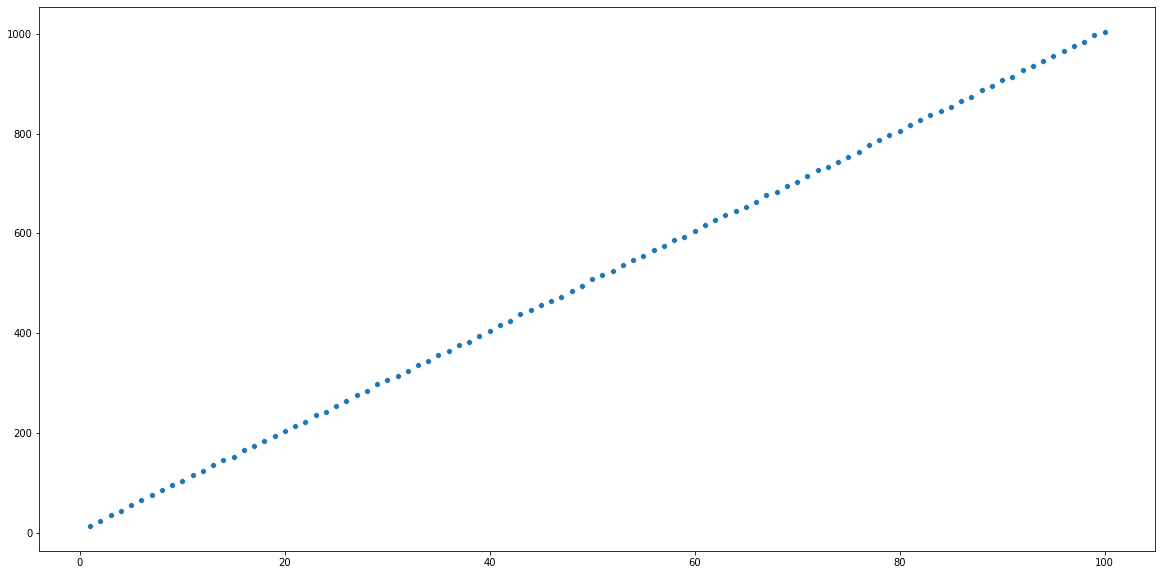

In [231]:
sns.scatterplot(x,y)

In [232]:
from sklearn.linear_model import LinearRegression

In [233]:
regressor = LinearRegression().fit(x.values.reshape(-1,1),y.values.reshape(-1,1))

In [234]:
regressor.coef_,regressor.intercept_

(array([[10.00421086]]), array([5.21115544]))

DERIVATIVE METHOD

In [235]:
import sympy

In [236]:
# beta 1
beta1=(((x-x.mean())*(y-y.mean())).sum())/(((x-x.mean())**2).sum())
beta1

10.004210864043896

In [237]:
#b0
y.mean()-beta1*x.mean()

5.211155443913185

GRADIENT DESCENT

In [238]:
#standardise x and add bias column (b0)
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 
x[:10]

array([[ 1.        , -1.70622042],
       [ 1.        , -1.67175132],
       [ 1.        , -1.63728222],
       [ 1.        , -1.60281312],
       [ 1.        , -1.56834402],
       [ 1.        , -1.53387492],
       [ 1.        , -1.49940582],
       [ 1.        , -1.46493672],
       [ 1.        , -1.43046762],
       [ 1.        , -1.39599852]])

In [239]:
lr = 0.001
b0,b1=np.random.randn(2)

In [240]:
def gradient_descent(x, y, theta, iterations, alpha):
    m=len(x)
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

In [241]:
#last observations or gradient descent corrospod to best parameters
theta = gradient_descent(x,y,np.random.rand(2),1000,0.1)[0][-1]

In [242]:
theta

array([510.42380408, 290.23708321])

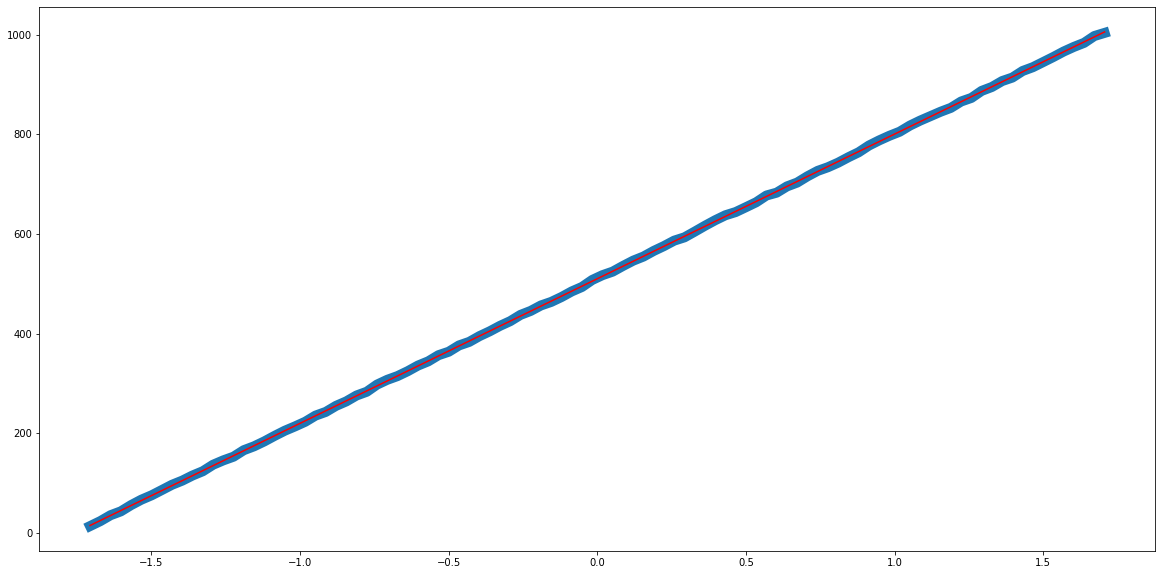

In [243]:
plt.plot(x[:,1],y,lw=10)
plt.plot(x[:,1],np.dot(x,theta),color='r')

STOCHASTIC GRADIENT DESCENT

In [244]:
def stochastic_gradient_descent(x, y, theta,iterations, alpha):
    costs = []
    thetas = []
    size = len(x)    
    for _ in range(iterations):
        ind = np.random.randint(0,size)
        ans = np.dot(x[ind],theta)
        error = (y[ind] - ans)
        cost = 2*error**2/size
        costs.append(cost)
        theta = theta + (2*alpha*(error*x[ind]))
        
        thetas.append(theta)
    return costs,thetas

In [245]:
s_theta = stochastic_gradient_descent(x,y,np.random.randn(2),1000,0.01)[-1][-1]

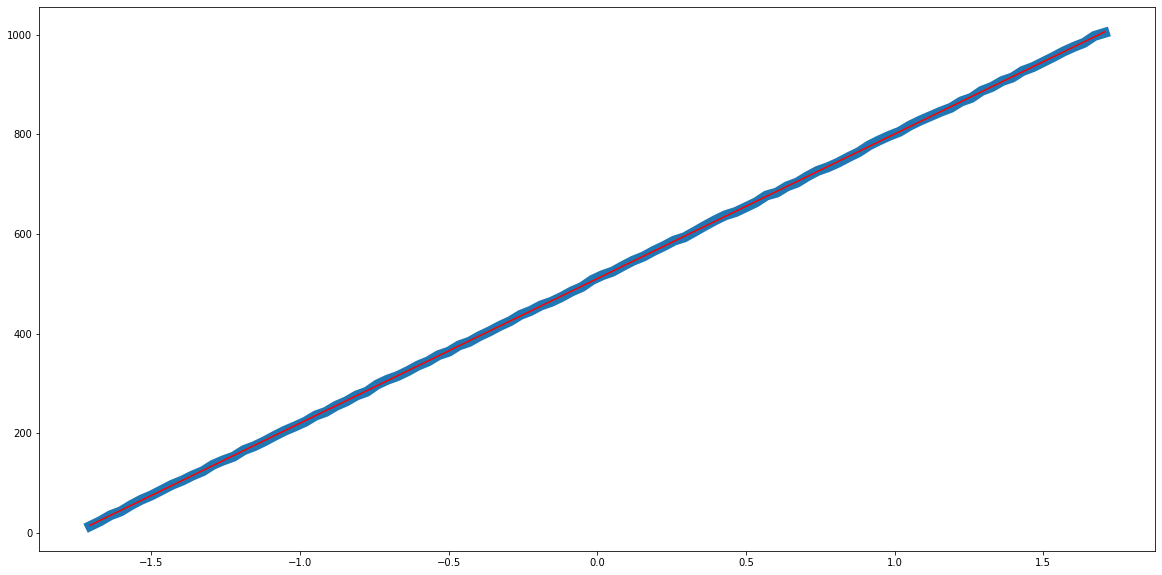

In [246]:
plt.plot(x[:,1],y,lw=10)
plt.plot(x[:,1],np.dot(x,s_theta),color='r')

MINI-BATCH GRADIENT DESCENT

In [247]:
def mini_batch_gradient_descent(x, y, theta,iterations, alpha,batchsize):
    
    costs = []
    thetas = []
    size = len(x)    
    for _ in range(iterations):
        ind = np.random.randint(0,size,batchsize)
        ans = np.dot(x[ind],theta)
        error = (y[ind] - ans)
        cost = 1/(2*size) * np.dot(error.T, error)
        costs.append(cost)
        theta = theta + (2*alpha*np.dot(x[ind].T, error))
        
        thetas.append(theta)
    return costs,thetas

In [248]:
mb_theta = mini_batch_gradient_descent(x,y,np.random.randn(2),1000,0.01,10)[-1][-1]

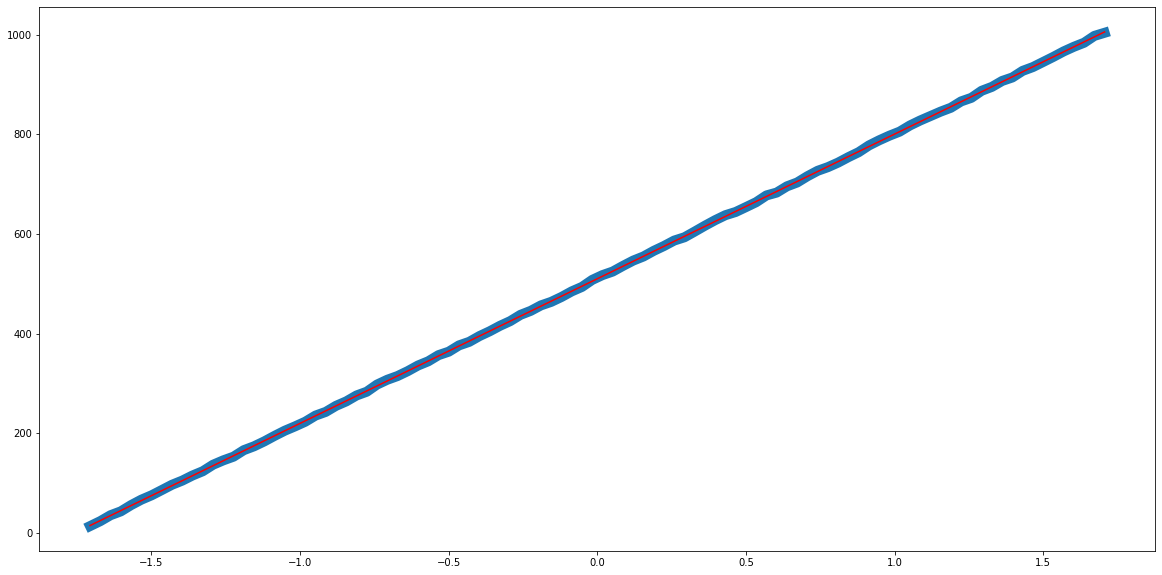

In [249]:
plt.plot(x[:,1],y,lw=10)
plt.plot(x[:,1],np.dot(x,mb_theta),color='r')

# Comparision between Batch, Stochastic and Mini-batch

All these approaches attain minimum cost but at different speeds and accuracies

In [250]:
import time

In [251]:
theta = np.random.randn(2)
a=time.time()
gradient_descent(x,y,theta,1000,0.01)
b=time.time()
print(f"Time Taken by Batch Gradient Descent {b-a}")

a=time.time()
stochastic_gradient_descent(x,y,theta,1000,0.01)
b=time.time()
print(f"Time Taken by Stochastic Gradient Descent {b-a}")

a=time.time()
mini_batch_gradient_descent(x,y,theta,100,0.01,10)
b=time.time()
print(f"Time Taken by Mini-Batch Gradient Descent {b-a}")

Time Taken by Batch Gradient Descent 0.2318730354309082
Time Taken by Stochastic Gradient Descent 0.046776533126831055
Time Taken by Mini-Batch Gradient Descent 0.06250572204589844


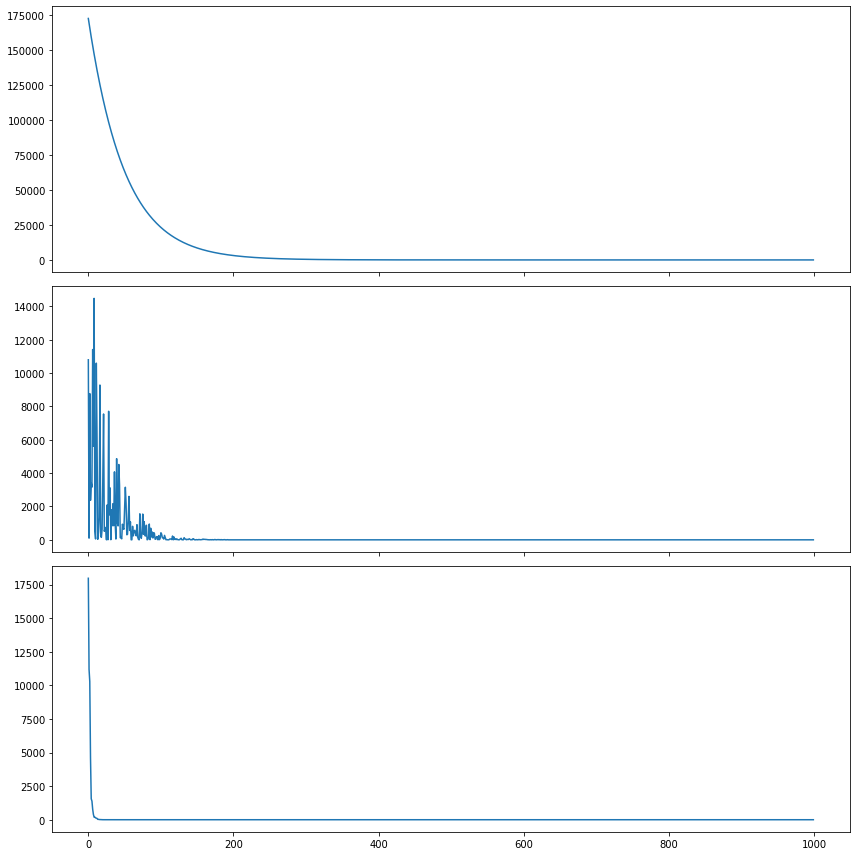

In [252]:
fig,ax = plt.subplots(nrows=3,sharex=True,figsize=(12,12))
sns.lineplot(range(1000),gradient_descent(x,y,theta,1000,0.01)[1],ax=ax[0])
sns.lineplot(range(1000),stochastic_gradient_descent(x,y,theta,1000,0.01)[0],ax=ax[1])
sns.lineplot(range(1000),mini_batch_gradient_descent(x,y,theta,1000,0.01,10)[0],ax=ax[2])
plt.tight_layout()